In [ ]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: c:\Users\hafst\.pyenv\pyenv-win\versions\3.11.0rc2\python.exe -m pip install --upgrade pip


In [103]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [104]:


# Fetch S&P 500 data
df = yf.Ticker("^GSPC")
df = df.history(period="max")

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


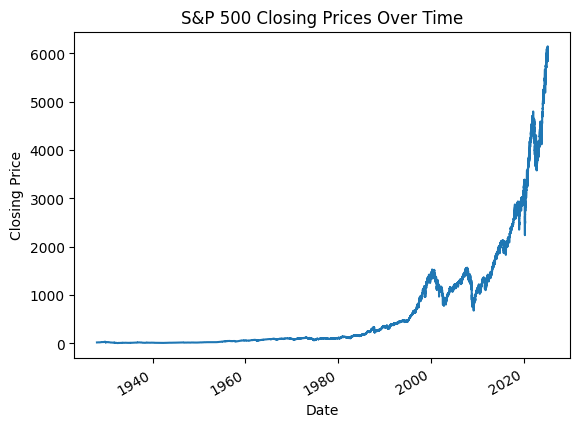

In [105]:
df['Close'].plot(title='S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

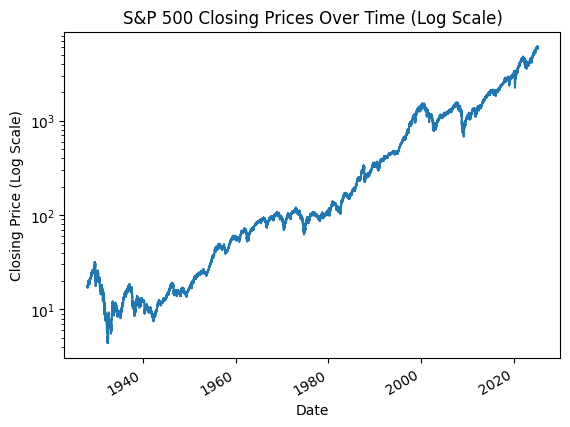

In [106]:
df['Close'].plot(title='S&P 500 Closing Prices Over Time (Log Scale)', logy=True)
plt.xlabel('Date')
plt.ylabel('Closing Price (Log Scale)')
plt.show()

In [ ]:
### DO DATA PREPROCESSING HERE ###



In [107]:

date_ranges = {
    "before_dot_com": ("1995-01-01", "2000-03-10"),
    "dot_com_to_financial_crisis": ("2000-03-10", "2008-09-15"),
    "financial_crisis_to_flash_crash": ("2008-09-15", "2010-05-06"),
    "covid_to_russia_invasion": ("2020-03-11", "2022-02-24"),
    "russia_invasion_to_future": ("2022-02-24", "2024-12-31"),
}

df_reset = df.reset_index()

# Create a dictionary to store the new DataFrames
dfs_dict = {period: df_reset[(df_reset["Date"] >= start) & (df_reset["Date"] <= end)].copy()
            for period, (start, end) in date_ranges.items()}
dfs_dict["before_dot_com"].head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
16815,1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,0.0,0.0
16816,1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,0.0,0.0
16817,1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,0.0,0.0
16818,1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,0.0,0.0
16819,1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,0.0,0.0


Period: before_dot_com
ADF Statistic: -7.876381931985298
p-value: 4.831575983014664e-12
The data is not stationary


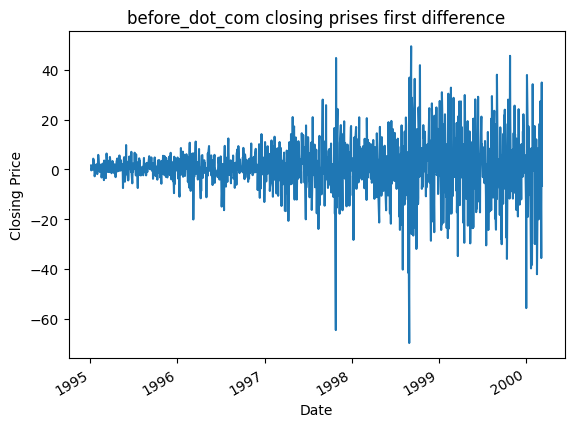

Period: dot_com_to_financial_crisis
ADF Statistic: -12.14364085395047
p-value: 1.6294121095607037e-22
The data is not stationary


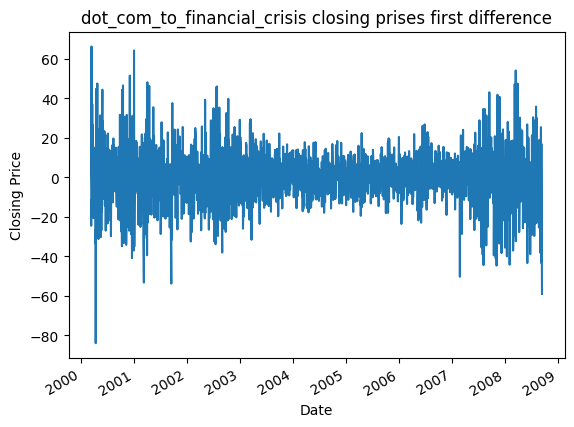

Period: financial_crisis_to_flash_crash
ADF Statistic: -17.873762592029106
p-value: 3.020636733505855e-30
The data is not stationary


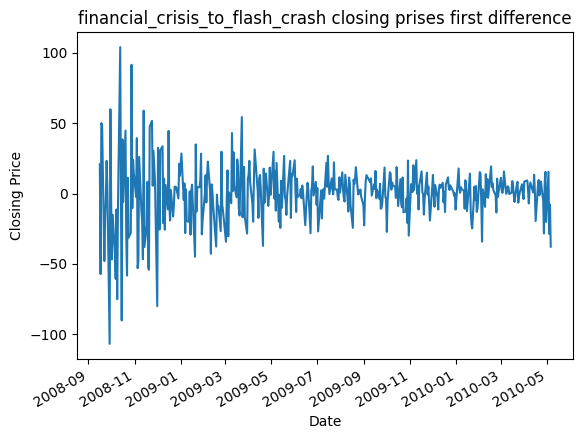

Period: covid_to_russia_invasion
ADF Statistic: -12.971034656040434
p-value: 3.0809162102200416e-24
The data is not stationary


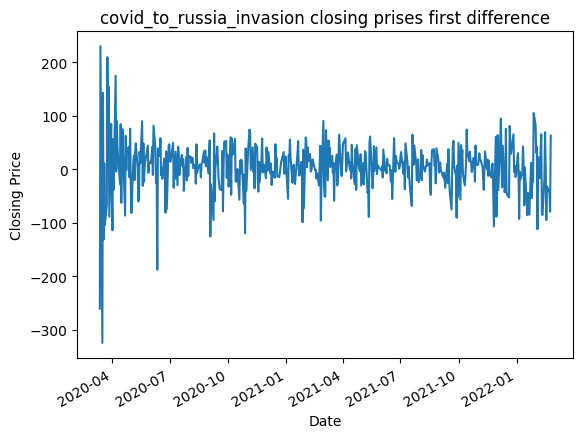

Period: russia_invasion_to_future
ADF Statistic: -26.371727776594597
p-value: 0.0
The data is not stationary


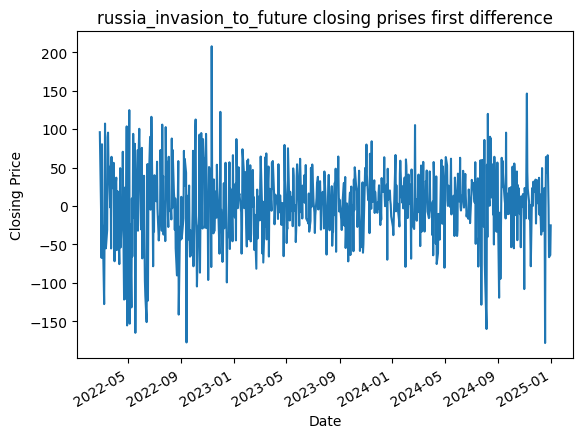

In [108]:
# 
for period in dfs_dict:
    dfs_dict[period] = dfs_dict[period].reset_index()  
    dfs_dict[period].set_index("Date", inplace=True)
    dfs_dict[period]["Close_first_diff"] = dfs_dict[period]["Close"].diff()
    dfs_dict[period] = dfs_dict[period]["Close_first_diff"].dropna()

    result = adfuller(dfs_dict[period])
    print(f"Period: {period}")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The data is not stationary")
    elif result[1] >= 0.05:
        print("The data is stationary")
    else:
        raise ValueError("The p-value is not a number")

    dfs_dict[period].plot(title=f'{period} closing prises first difference')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()


### Informal:
This proves that there are variances in returns